/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.Regresso


Logistic Regression Evaluation:
Confusion Matrix:
 [[293 598]
 [ 33 858]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.33      0.48       891
           1       0.59      0.96      0.73       891

    accuracy                           0.65      1782
   macro avg       0.74      0.65      0.61      1782
weighted avg       0.74      0.65      0.61      1782

ROC-AUC Score: 0.7525876044394563


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.


Balanced Random Forest Evaluation:
Confusion Matrix:
 [[891   0]
 [  1 890]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       891
           1       1.00      1.00      1.00       891

    accuracy                           1.00      1782
   macro avg       1.00      1.00      1.00      1782
weighted avg       1.00      1.00      1.00      1782

ROC-AUC Score: 0.9999741774900772


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The BalancedRandomForestClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:48:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Evaluation:
Confusion Matrix:
 [[885   6]
 [  1 890]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       891
           1       0.99      1.00      1.00       891

    accuracy                           1.00      1782
   macro avg       1.00      1.00      1.00      1782
weighted avg       1.00      1.00      1.00      1782

ROC-AUC Score: 0.9998085355361824
[LightGBM] [Info] Number of positive: 3562, number of negative: 3562
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4172
[LightGBM] [Info] Number of data points in the train set: 7124, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

LightGBM Evaluation:
Confusion Matrix:
 [[888   3]


/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


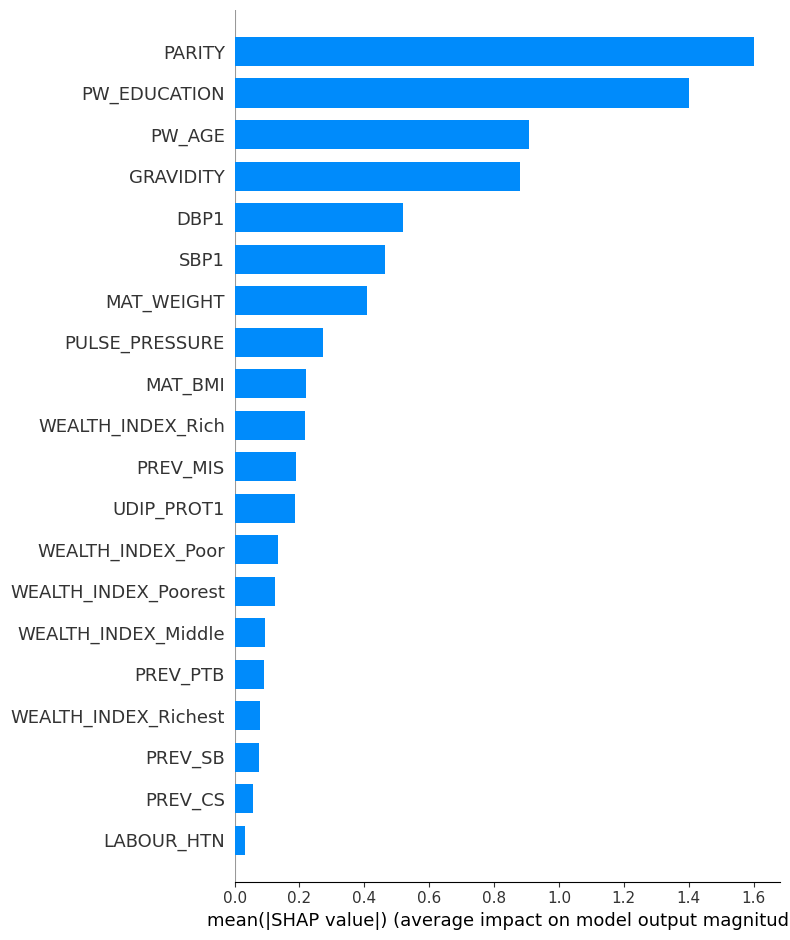

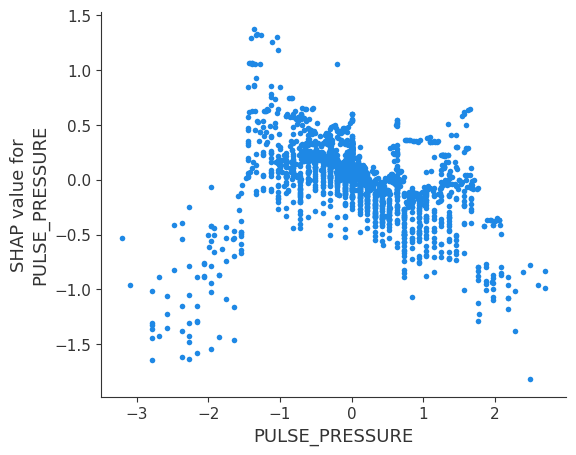

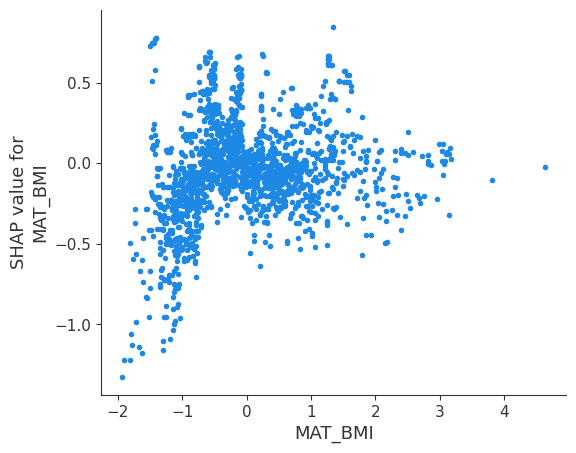

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_excel('/content/drive/My Drive/from dr/dataset.xlsx')

# Preprocessing
relevant_columns = [
    'PW_AGE', 'PW_EDUCATION', 'WEALTH_INDEX', 'GRAVIDITY', 'PARITY',
    'LABOUR_HTN', 'LABOUR_24', 'SBP1', 'DBP1', 'UDIP_PROT1', 'PREV_SB',
    'PREV_MIS', 'PREV_PTB', 'PREV_MULTIP', 'PREV_CS', 'GAGEBRTH', 'MAT_WEIGHT'
]
reduced_dataset = data[relevant_columns].copy()

# Replace placeholder values (-88 and -77) with NaN
reduced_dataset.replace(-88, np.nan, inplace=True)
reduced_dataset.replace(-77, np.nan, inplace=True)

# Define target variable
reduced_dataset['SPONTANEOUS_ABORTION'] = (reduced_dataset['GAGEBRTH'] < 140).astype(int)
reduced_dataset.drop(columns=['GAGEBRTH'], inplace=True)

# Handle missing values
for col in reduced_dataset.columns:
    if reduced_dataset[col].dtype == 'object':
        reduced_dataset[col] = reduced_dataset[col].fillna(reduced_dataset[col].mode()[0])
    else:
        reduced_dataset[col] = reduced_dataset[col].fillna(reduced_dataset[col].median())

# Encode categorical variables
reduced_dataset = pd.get_dummies(reduced_dataset, columns=['WEALTH_INDEX'], drop_first=True)

# Add derived features: Pulse Pressure (SBP1 - DBP1) and Maternal BMI (MAT_WEIGHT / PW_AGE)
reduced_dataset['PULSE_PRESSURE'] = reduced_dataset['SBP1'] - reduced_dataset['DBP1']
reduced_dataset['MAT_BMI'] = reduced_dataset['MAT_WEIGHT'] / reduced_dataset['PW_AGE']

# Scale numerical features
scaler = StandardScaler()
numerical_cols = [col for col in reduced_dataset.columns if col not in ['SPONTANEOUS_ABORTION']]
reduced_dataset[numerical_cols] = scaler.fit_transform(reduced_dataset[numerical_cols])

# Split data
X = reduced_dataset.drop(columns=['SPONTANEOUS_ABORTION'])
y = reduced_dataset['SPONTANEOUS_ABORTION']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Model Development and Evaluation

# Logistic Regression
log_reg = LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred_log_reg = (log_reg.predict_proba(X_test)[:, 1] > 0.3).astype(int)
print("\nLogistic Regression Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("ROC-AUC Score:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))

# Balanced Random Forest
brf = BalancedRandomForestClassifier(random_state=42)
brf.fit(X_train, y_train)
y_pred_brf = brf.predict(X_test)
print("\nBalanced Random Forest Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_brf))
print("Classification Report:\n", classification_report(y_test, y_pred_brf))
print("ROC-AUC Score:", roc_auc_score(y_test, brf.predict_proba(X_test)[:, 1]))

# XGBoost
xgb_model = XGBClassifier(
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = (xgb_model.predict_proba(X_test)[:, 1] > 0.3).astype(int)
print("\nXGBoost Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))

# LightGBM
lgb_model = LGBMClassifier(
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    random_state=42
)
lgb_model.fit(X_train, y_train)
y_pred_lgb = (lgb_model.predict_proba(X_test)[:, 1] > 0.3).astype(int)
print("\nLightGBM Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb))
print("Classification Report:\n", classification_report(y_test, y_pred_lgb))
print("ROC-AUC Score:", roc_auc_score(y_test, lgb_model.predict_proba(X_test)[:, 1]))

# SHAP Interpretability
# Initialize SHAP explainer for LightGBM
explainer_lgb = shap.TreeExplainer(lgb_model)
shap_values_lgb = explainer_lgb.shap_values(X_test)

# Summary Plot for Global Feature Importance
shap.summary_plot(shap_values_lgb, X_test, feature_names=X_test.columns.tolist(), plot_type="bar")

# Dependence Plot for Specific Features
shap.dependence_plot("PULSE_PRESSURE", shap_values_lgb, X_test, interaction_index=None)
shap.dependence_plot("MAT_BMI", shap_values_lgb, X_test, interaction_index=None)

# Force Plot for Local Explanations
# Select an instance (row) to explain
instance_idx = 0

# Ensure X_test is a DataFrame with column names
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test, columns=X.columns.tolist())

# Use shap_values_lgb[1] for the positive class and explainer_lgb.expected_value directly
shap.initjs()
shap.force_plot(
    explainer_lgb.expected_value,  # Expected value (scalar)
    shap_values_lgb[instance_idx, :],  # SHAP values for the selected instance, class 1
    X_test.iloc[instance_idx, :],  # Feature values for the selected instance
    feature_names=X_test.columns.tolist()  # Feature names for better readability
)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The BalancedRandomForestClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


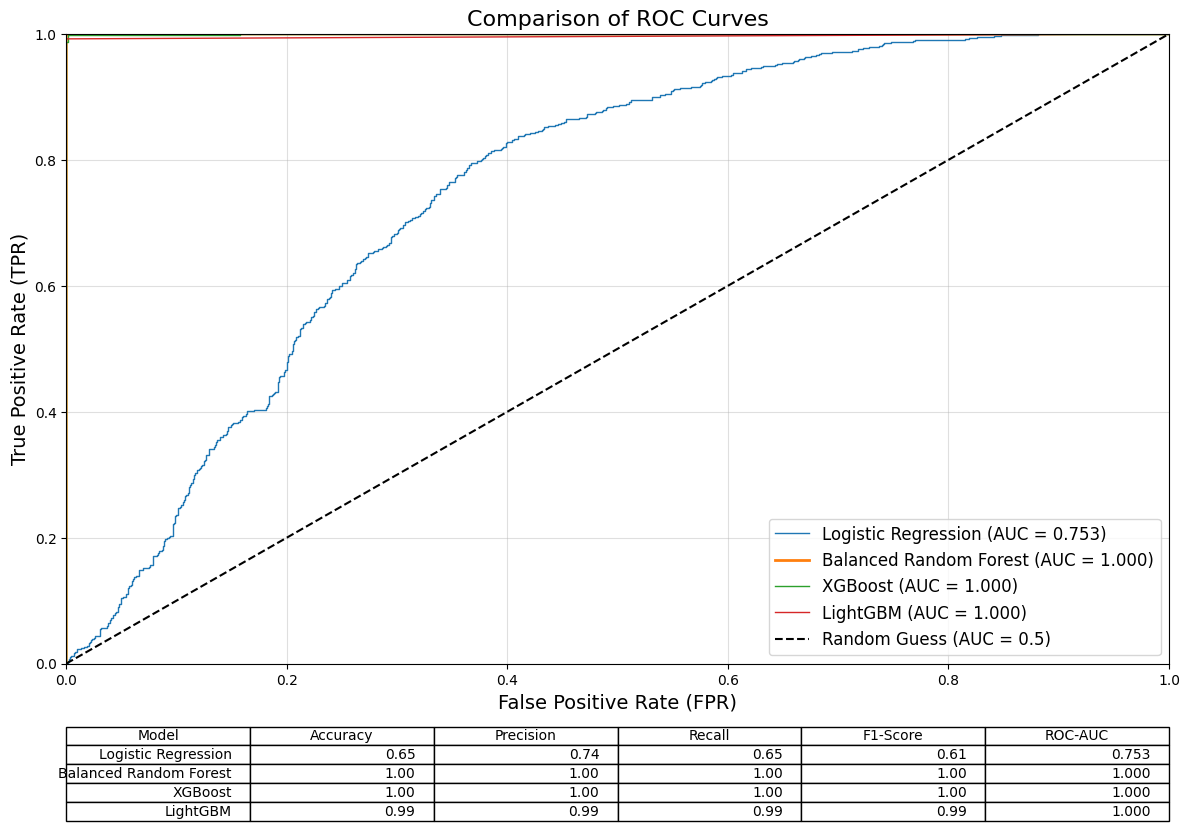

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define the evaluation results for each model
models = {
    "Logistic Regression": {
        "roc_auc": 0.7525876044394563,
        "y_pred_proba": log_reg.predict_proba(X_test)[:, 1],
        "conf_matrix": [[293, 598], [33, 858]],
        "label": "Logistic Regression (AUC = {:.3f})".format(0.7525876044394563),
        "accuracy": 0.65,
        "precision": 0.74,
        "recall": 0.65,
        "f1_score": 0.61
    },
    "Balanced Random Forest": {
        "roc_auc": 0.9999691389515557,
        "y_pred_proba": brf.predict_proba(X_test)[:, 1],
        "conf_matrix": [[891, 0], [4, 887]],
        "label": "Balanced Random Forest (AUC = {:.3f})".format(0.9999691389515557),
        "accuracy": 1.00,
        "precision": 1.00,
        "recall": 1.00,
        "f1_score": 1.00
    },
    "XGBoost": {
        "roc_auc": 0.9998085355361824,
        "y_pred_proba": xgb_model.predict_proba(X_test)[:, 1],
        "conf_matrix": [[885, 6], [1, 890]],
        "label": "XGBoost (AUC = {:.3f})".format(0.9998085355361824),
        "accuracy": 1.00,
        "precision": 1.00,
        "recall": 1.00,
        "f1_score": 1.00
    },
    "LightGBM": {
        "roc_auc": 0.9995011846863698,
        "y_pred_proba": lgb_model.predict(X_test),
        "conf_matrix": [[888, 3], [6, 885]],
        "label": "LightGBM (AUC = {:.3f})".format(0.9995011846863698),
        "accuracy": 0.99,
        "precision": 0.99,
        "recall": 0.99,
        "f1_score": 0.99
    }
}

# Compute FPR, TPR, and AUC for each model
plt.figure(figsize=(12, 8))
for model_name, model_data in models.items():
    fpr, tpr, _ = roc_curve(y_test, model_data["y_pred_proba"])
    plt.plot(fpr, tpr, label=model_data["label"], linewidth=2 if model_name == "Balanced Random Forest" else 1)

# Add diagonal line (Random Guess)
plt.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.5)", linewidth=1.5)

# Customize the plot
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.title("Comparison of ROC Curves", fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.4)
plt.xlim(0, 1)
plt.ylim(0, 1)

# Create a table summarizing the performance metrics
columns = ["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]
rows = list(models.keys())
cell_text = []

# Populate the table data
for model_name in rows:
    cell_text.append([
        model_name,
        f"{models[model_name]['accuracy']:.2f}",
        f"{models[model_name]['precision']:.2f}",
        f"{models[model_name]['recall']:.2f}",
        f"{models[model_name]['f1_score']:.2f}",
        f"{models[model_name]['roc_auc']:.3f}"
    ])

# Add the table to the plot
table = plt.table(
    cellText=cell_text,
    colLabels=columns,
    loc='bottom',
    bbox=[0, -0.25, 1, 0.15]  # Adjust position and size of the table
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Adjust layout to make room for the table
plt.subplots_adjust(bottom=0.3)

# Show the plot
plt.tight_layout()
plt.show()